**Data Analysis Internship Task**

 **Level 1**

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter


In [2]:
# Upload dataset
from google.colab import files
uploaded = files.upload()

# Load CSV
df = pd.read_csv('Dataset .csv')
df.head()

Saving Dataset .csv to Dataset .csv


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


Task 1: Top Cuisines

[('North Indian', 3960, 41.5), ('Chinese', 2735, 28.66), ('Fast Food', 1986, 20.81)]


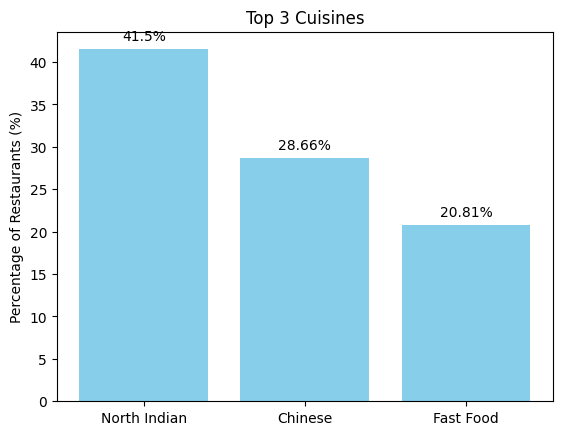

In [3]:
# Remove missing values in 'Cuisines'
df_cuisines = df.dropna(subset=['Cuisines'])

# Count cuisines (split multiple cuisines)
cuisine_list = df_cuisines['Cuisines'].str.split(', ').sum()
cuisine_counts = Counter(cuisine_list)
top_3 = cuisine_counts.most_common(3)

# Total restaurants
total = len(df_cuisines)

# Percentage of top cuisines
top_3_pct = [(cuisine, count, round(count / total * 100, 2)) for cuisine, count in top_3]
print(top_3_pct)

# Bar chart
labels = [i[0] for i in top_3_pct]
values = [i[2] for i in top_3_pct]

plt.bar(labels, values, color='skyblue')
plt.title("Top 3 Cuisines")
plt.ylabel("Percentage of Restaurants (%)")
for i, v in enumerate(values):
    plt.text(i, v + 1, f"{v}%", ha='center')
plt.show()


Task 2: City Analysis

Top City: New Delhi 5473
Top Rated City: Inner City 4.9


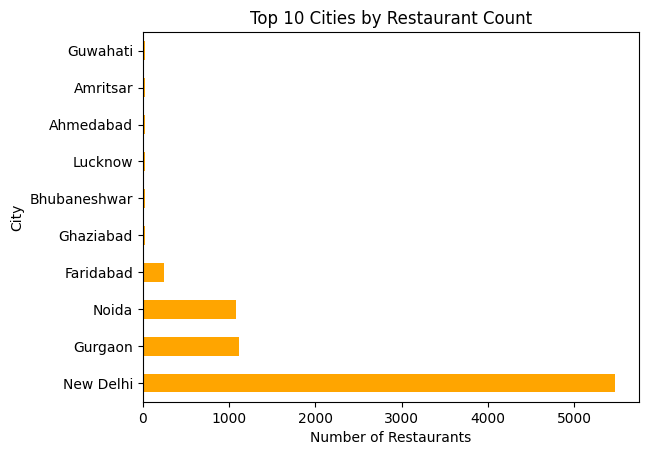

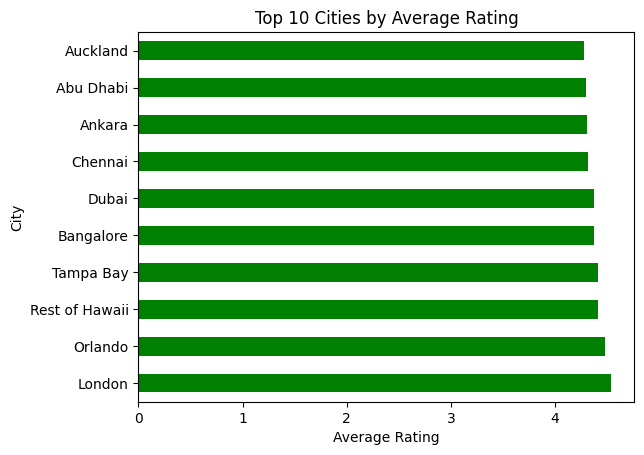

In [4]:
# City with most restaurants
city_counts = df['City'].value_counts()
print("Top City:", city_counts.idxmax(), city_counts.max())

# Average rating per city
avg_ratings = df.groupby('City')['Aggregate rating'].mean()
top_avg_city = avg_ratings.idxmax()
print("Top Rated City:", top_avg_city, round(avg_ratings.max(), 2))

# Plot top 10 cities by count
city_counts.head(10).plot(kind='barh', color='orange', title="Top 10 Cities by Restaurant Count")
plt.xlabel("Number of Restaurants")
plt.show()

# Plot top 10 cities by rating (at least 20 restaurants)
valid_cities = df['City'].value_counts()[df['City'].value_counts() >= 20].index
filtered = df[df['City'].isin(valid_cities)]
top_rated = filtered.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False).head(10)
top_rated.plot(kind='barh', color='green', title="Top 10 Cities by Average Rating")
plt.xlabel("Average Rating")
plt.show()


Task 3: Price Range Distribution

Price range
1    46.53
2    32.59
3    14.74
4     6.14
Name: count, dtype: float64


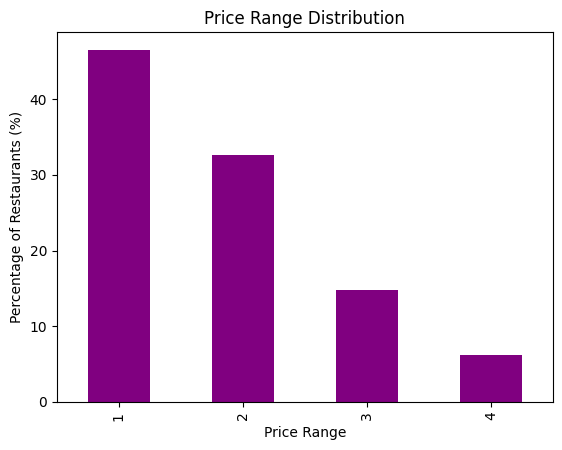

In [5]:
# Count by price range
price_counts = df['Price range'].value_counts().sort_index()

# Percentage
total_price = price_counts.sum()
price_pct = (price_counts / total_price * 100).round(2)
print(price_pct)

# Plot
price_pct.plot(kind='bar', color='purple', title="Price Range Distribution")
plt.xlabel("Price Range")
plt.ylabel("Percentage of Restaurants (%)")
plt.show()


Task 4: Online Delivery Analysis

Has Online delivery
No     74.337766
Yes    25.662234
Name: count, dtype: float64
Has Online delivery
No     2.465296
Yes    3.248837
Name: Aggregate rating, dtype: float64


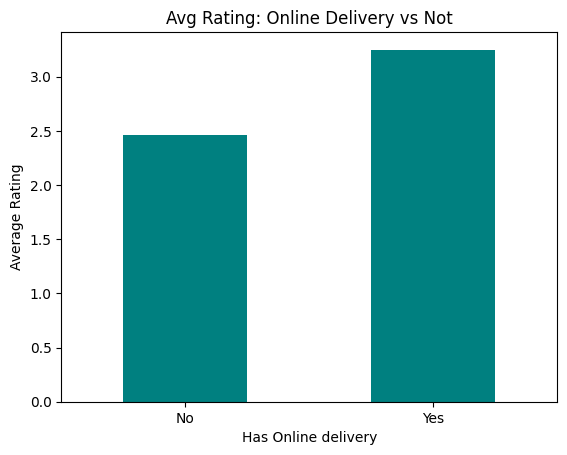

In [6]:
# Percentage offering online delivery
delivery_counts = df['Has Online delivery'].value_counts()
delivery_pct = delivery_counts / delivery_counts.sum() * 100
print(delivery_pct)

# Compare average ratings
avg_rating_delivery = df.groupby('Has Online delivery')['Aggregate rating'].mean()
print(avg_rating_delivery)

# Plot
avg_rating_delivery.plot(kind='bar', color='teal', title="Avg Rating: Online Delivery vs Not")
plt.ylabel("Average Rating")
plt.xticks(rotation=0)
plt.show()


****